<a href="https://colab.research.google.com/github/MichaelR-DS/Retail_Customer_Segmentation/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import datetime as dt

!pip install pycountry
import pycountry #converts country names to country codes demanded by choropleth

!pip install plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df = pd.read_csv('/content/drive/MyDrive/online_retail_data_analysis/retail_data_clean.csv', index_col=[0])
df['TotalSpent'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Customer Analysis

In [72]:
df['InvoiceNo'].astype('string').str[0].isin(['C', 'c']).any() #No cancellations

False

In [73]:
df[['Quantity', 'TotalSpent']].describe()

,Quantity,TotalSpent
count,397884.000000,397884.000000
mean,12.988238,22.397000
std,179.331775,309.071041
min,1.000000,0.001000
25%,2.000000,4.680000
50%,6.000000,11.800000
75%,12.000000,19.800000
max,80995.000000,168469.600000


Text(0, 0.5, 'Total Spent (£)')

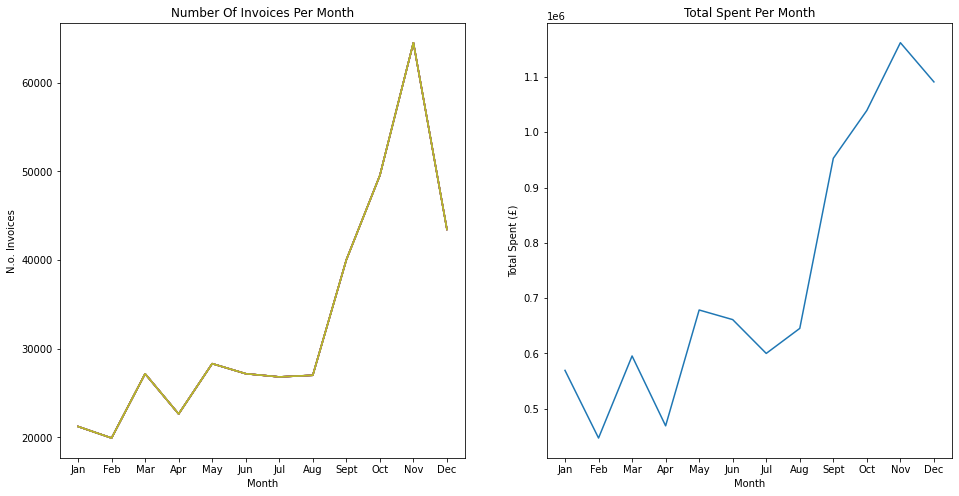

In [74]:
#Timeseries of number of sales

#df['InvoiceDate'].unique()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

invoices_monthly = df.groupby(df['InvoiceDate'].dt.month).count()
totalspent_monthly = df.groupby(df['InvoiceDate'].dt.month).sum()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

#Plot Invoice Time Series Monthly:
axs[0].set_title('Number Of Invoices Per Month')
axs[0].plot(invoices_monthly)
axs[0].set_xlabel('Month')
axs[0].set_xticks(range(1,13))
axs[0].set_xticklabels( ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec') )
axs[0].set_ylabel('N.o. Invoices')

#Plot TotalSpent Time Series
axs[1].set_title('Total Spent Per Month')
axs[1].plot(totalspent_monthly['TotalSpent'])
axs[1].set_xlabel('Month')
axs[1].set_xticks(range(1,13))
axs[1].set_xticklabels( ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec') )
axs[1].set_ylabel('Total Spent (£)')

# Revenue Per Country

In [75]:
#@title
#How many customers & orders of each country
customer_country = df[['CustomerID', 'Country', 'InvoiceNo']]
by_country_invoices = customer_country.groupby('CustomerID').agg({'Country':lambda x: x.value_counts().index[0], 'InvoiceNo':'count'}).sort_values('InvoiceNo', ascending=False).reset_index()
by_country_invoices[0:10]

,CustomerID,Country,InvoiceNo
0,17841.0,United Kingdom,7847
1,14911.0,EIRE,5675
2,14096.0,United Kingdom,5111
3,12748.0,United Kingdom,4595
4,14606.0,United Kingdom,2700
5,15311.0,United Kingdom,2379
6,14646.0,Netherlands,2076
7,13089.0,United Kingdom,1818
8,13263.0,United Kingdom,1677
9,14298.0,United Kingdom,1637


In [76]:
#Revenue per country
df['Country'] = df['Country'].replace({'EIRE':'Ireland', 'Channel Islands':'United Kingdom', 'RSA':'South Africa'})

spent_by_country = df.groupby(by='Country').sum()[['TotalSpent']]
spent_by_country.drop(['European Community', 'Unspecified'], axis=0, inplace=True)

country_list = spent_by_country.index

#getting country codes
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
codes = [countries.get(country, 'Unknown') for country in country_list]
codes[7] = 'CZE'
codes[31] = 'USA'

spent_by_country['CountryCode'] = codes
spent_by_country.reset_index(level=0, inplace=True)
spent_by_country.sort_values(by='TotalSpent', ascending=False)

,Country,TotalSpent,CountryCode
33,United Kingdom,7.328842e+06,GBR
21,Netherlands,2.854463e+05,NLD
14,Ireland,2.655459e+05,IRL
11,Germany,2.288671e+05,DEU
10,France,2.090240e+05,FRA
0,Australia,1.385213e+05,AUS
28,Spain,6.157711e+04,ESP
30,Switzerland,5.644395e+04,CHE
3,Belgium,4.119634e+04,BEL
29,Sweden,3.837833e+04,SWE


In [77]:
#@title
#Proportionate amount spent by customers of each country. Lighter colour = higher proportion spent

fig = go.Figure()

fig.add_choropleth(locations=spent_by_country['CountryCode'],
                   z=np.log10(spent_by_country['TotalSpent']),
                   text=spent_by_country['Country'],
                   colorscale='cividis',
                   autocolorscale=False,
                   reversescale=False)
fig.show()

In [78]:
print('UK sales account for {}% of the total amount spent on the store'.format(spent_by_country['TotalSpent'][33]/spent_by_country['TotalSpent'].sum()))

UK sales account for 0.8227775335560462% of the total amount spent on the store


# RFM Analysis

In [79]:
#@title
#RFM
#Assumptions: the recency of a purchase made up to 11 years ago isn't going to help the analysis very much. Therefore the recency will be calculated using the last invoice date: 10/12/2011.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
customer_df = df[['CustomerID', 'InvoiceNo','InvoiceDate', 'TotalSpent']]
latest_date = customer_df['InvoiceDate'].max() 

#Changing columns to:
#InvoiceDate --> Days since last purchase (as of 10/12/2011). This is the "Recency" part of the RFM analysis.
#InvoiceNo --> n.o. invoices (transactions) per customer. This is the "Frequency" of customer transactions.
#TotalSpent --> Mean of TotalSpent. This is the "Monetary" part of the RFM analysis.

customer_df = df.groupby(by='CustomerID').agg({'InvoiceNo':'count', 'TotalSpent':'mean', 'InvoiceDate':lambda x: (latest_date - x.max()).days })
customer_df.rename(columns = {'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalSpent':'MeanTotalSpent'}, inplace=True)
rfm_df = customer_df

rfm_df.head()

,Frequency,MeanTotalSpent,Recency
CustomerID,,,
12346.0,1,77183.600000,325
12347.0,182,23.681319,1
12348.0,31,57.975484,74
12349.0,73,24.076027,18
12350.0,17,19.670588,309


In [80]:
#Outlier Removal

monetary_z = ( rfm_df['MeanTotalSpent'] - rfm_df['MeanTotalSpent'].mean() )/rfm_df['MeanTotalSpent'].std()
customer_df['MeanTotalSpent'].std()

print(monetary_z[monetary_z > 3].count()) #How many monetary values above/under 3 std devs from mean.

from scipy import stats
rfm_df = rfm_df[(np.abs(stats.zscore(rfm_df)) < 4).all(axis=1)] #Removes all rows where, in that column, the value is above or under 4 std devs from mean

3


In [81]:
rfm_df.sort_values('MeanTotalSpent', ascending=False)

,Frequency,MeanTotalSpent,Recency
CustomerID,,,
15749.0,10,4453.430000,234
15195.0,1,3861.000000,2
13135.0,1,3096.000000,196
17846.0,1,2033.100000,84
18087.0,2,2027.860000,97
...,...,...,...
17254.0,112,2.432500,4
13271.0,96,2.264375,36
13684.0,30,2.241000,285


In [82]:
rfm_df.corr()

,Frequency,MeanTotalSpent,Recency
Frequency,1.000000,-0.072052,-0.340998
MeanTotalSpent,-0.072052,1.000000,0.028490
Recency,-0.340998,0.028490,1.000000


In [83]:
#Dividing data into quintiles; scores from 1-5 for each category, 5 being the highest.

percentile = np.arange(1, 6) * 20

freq_percentiles = np.percentile(rfm_df['Frequency'], percentile)
mon_percentiles = np.percentile(rfm_df['MeanTotalSpent'], percentile)
rec_percentiles = np.percentile(rfm_df['Recency'], percentile)

rfm_df['freq_score'] = np.digitize(rfm_df['Frequency'], freq_percentiles, right=True) + 1
rfm_df['mon_score'] = np.digitize(rfm_df['MeanTotalSpent'], mon_percentiles, right=True) + 1
rfm_df['rec_score'] = (4 - np.digitize(rfm_df['Recency'], rec_percentiles, right=True)) + 1 #lower 'Recency' is better, make higher 'recency_score' better

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [84]:
rfm_df

,Frequency,MeanTotalSpent,Recency,freq_score,mon_score,rec_score
CustomerID,,,,,,
12347.0,182,23.681319,1,5,4,5
12348.0,31,57.975484,74,3,5,2
12349.0,73,24.076027,18,4,4,4
12350.0,17,19.670588,309,2,4,1
12352.0,85,29.482824,35,4,5,3
...,...,...,...,...,...,...
18280.0,10,18.060000,277,1,3,1
18281.0,7,11.545714,180,1,2,1
18282.0,12,14.837500,7,1,2,5


In [85]:
quartiles_df = pd.DataFrame({'freq_percentiles':freq_percentiles, 'mon_percentiles': mon_percentiles, 'rec_percentiles':rec_percentiles}, index=['20%', '40%', '60%', '80%', '100%'])
quartiles_df

,freq_percentiles,mon_percentiles,rec_percentiles
20%,14.0,9.726268,13.0
40%,29.0,16.226646,32.0
60%,58.0,19.590955,71.0
80%,119.0,28.500363,178.2
100%,981.0,4453.430000,373.0


In [86]:

rfm_df.sort_values('MeanTotalSpent', ascending=False)

,Frequency,MeanTotalSpent,Recency,freq_score,mon_score,rec_score
CustomerID,,,,,,
15749.0,10,4453.430000,234,1,5,1
15195.0,1,3861.000000,2,1,5,5
13135.0,1,3096.000000,196,1,5,1
17846.0,1,2033.100000,84,1,5,2
18087.0,2,2027.860000,97,1,5,2
...,...,...,...,...,...,...
17254.0,112,2.432500,4,4,1,5
13271.0,96,2.264375,36,4,1,3
13684.0,30,2.241000,285,3,1,1


In [88]:
rfm_df['freq_score'].unique()

array([5, 3, 4, 2, 1])

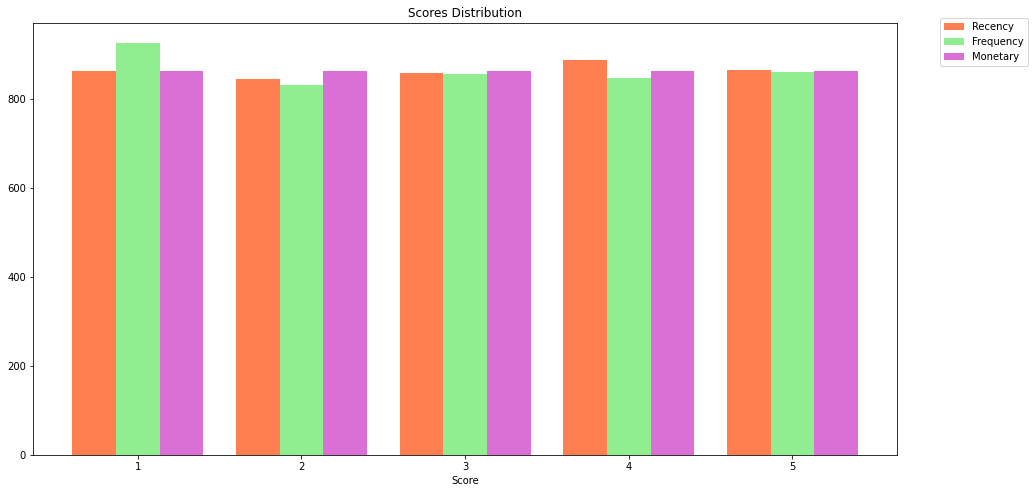

In [114]:
fig, ax = plt.subplots(figsize=(12, 6))

#Recency Scores
bins = np.arange(1,7) - 0.5
ax1 = fig.add_axes([0,0,1,1])
ax1.hist([rfm_df['rec_score'], rfm_df['freq_score'], rfm_df['mon_score']], bins=bins, color=['coral', 'lightgreen', 'orchid'], label=['Recency', 'Frequency', 'Monetary'])
ax1.set_xticks(range(1,6))
ax1.set_xticklabels( ('1', '2', '3', '4', '5') )
ax1.set_xlabel('Score')
ax1.set_title('Scores Distribution')

plt.legend(loc=(1.05, 0.9))
plt.show()

In [124]:
rfm_df

,Frequency,MeanTotalSpent,Recency,freq_score,mon_score,rec_score
CustomerID,,,,,,
12347.0,182,23.681319,1,5,4,5
12348.0,31,57.975484,74,3,5,2
12349.0,73,24.076027,18,4,4,4
12350.0,17,19.670588,309,2,4,1
12352.0,85,29.482824,35,4,5,3
...,...,...,...,...,...,...
18280.0,10,18.060000,277,1,3,1
18281.0,7,11.545714,180,1,2,1
18282.0,12,14.837500,7,1,2,5


Text(0.5, 1.0, 'Monetary Distribution')

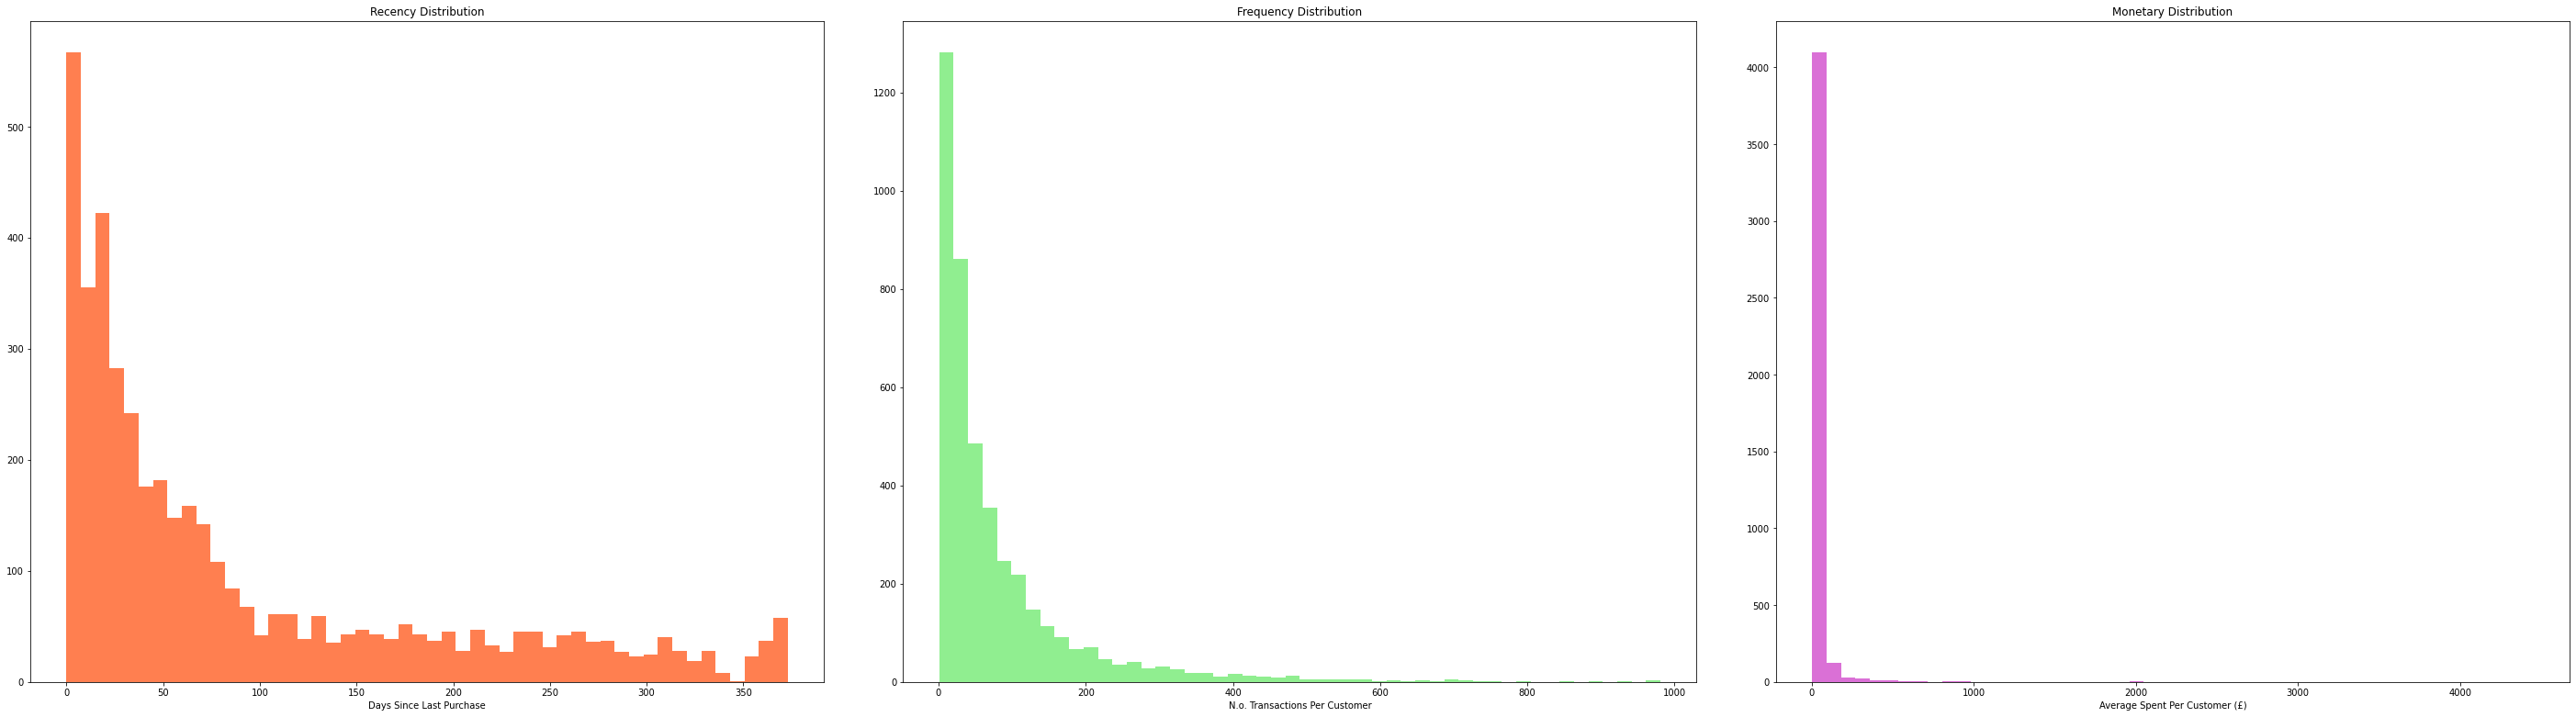

In [137]:
fig, ax = plt.subplots(figsize=(12, 10))

#Recency Dist
ax1 = fig.add_axes([0,0,1,1])
ax1.hist(rfm_df['Recency'], color=['coral'], bins=50)
ax1.set_xlabel('Days Since Last Purchase')
ax1.set_title('Recency Distribution')

#Frequency Dist
ax2 = fig.add_axes([1.1,0,1,1])
ax2.hist(rfm_df['Frequency'], color=['lightgreen'], bins=50)
ax2.set_xlabel('N.o. Transactions Per Customer')
ax2.set_title('Frequency Distribution')

#Monetary Dist
ax3 = fig.add_axes([2.2,0,1,1])
ax3.hist(rfm_df['MeanTotalSpent'], color=['Orchid'], bins=50)
ax3.set_xlabel('Average Spent Per Customer (£)')
ax3.set_title('Monetary Distribution')

# Customer Purchases

In [142]:
#Most Bought Items
pd.DataFrame(df['Description'].value_counts()).reset_index().rename(columns={"index": "StockCode", "Description": "Count"})

,StockCode,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
...,...,...
3872,GLASS BELL JAR SMALL,1
3873,BLACKCHRISTMAS TREE 30CM,1
3874,STORAGE TIN VINTAGE DOILEY,1
3875,BELL HEART ANTIQUE GOLD,1


In [138]:
#Items Bought Per Customer
purchases = df[['CustomerID', 'StockCode', 'Quantity']]

table = pd.pivot_table(purchases, values='Quantity', index=['CustomerID', 'StockCode'])
table

Quantity
CustomerID StockCode          
12346.0    23166       74215.0
12347.0    16008          24.0
           17021          36.0
           20665           6.0
           20719          10.0
...                        ...
18287.0    84920           4.0
           85039A         48.0
           85039B         40.0
           85040A         24.0
           85173          48.0

[266792 rows x 1 columns]

In [139]:
#Most purchased item per customer

ix = purchases.groupby('CustomerID')['Quantity'].idxmax()
purchases = purchases.loc[ix, ["CustomerID", "StockCode"]]
purchases.rename({'StockCode':'MostBoughtItem'})
purchases

,CustomerID,StockCode
61619,12346.0,23166
148290,12347.0,23076
34090,12348.0,21981
485568,12349.0,21231
80327,12350.0,22348
...,...,...
111054,18280.0,22084
222954,18281.0,22037
291855,18282.0,23187
263660,18283.0,23077


In [140]:
rfm_df

,Frequency,MeanTotalSpent,Recency,freq_score,mon_score,rec_score
CustomerID,,,,,,
12347.0,182,23.681319,1,5,4,5
12348.0,31,57.975484,74,3,5,2
12349.0,73,24.076027,18,4,4,4
12350.0,17,19.670588,309,2,4,1
12352.0,85,29.482824,35,4,5,3
...,...,...,...,...,...,...
18280.0,10,18.060000,277,1,3,1
18281.0,7,11.545714,180,1,2,1
18282.0,12,14.837500,7,1,2,5


# Saving And Export

In [141]:
#Saving customer data to csv in drive

#dropping uneccessary data
rfm_df.drop(['Frequency', 'MeanTotalSpent', 'Recency'], axis=1, inplace=True)

#rfm_df.to_csv('/content/drive/MyDrive/online_retail_data_analysis/rfm_df', index=True, encoding='utf-8-sig')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

